In [1]:
# import 
import os
import re
import string
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re
import nltk

import nltk
from nltk.corpus import stopwords


from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from tabulate import tabulate

In [2]:
# 设置支持中文的字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 设置字体为 SimHei
plt.rcParams['axes.unicode_minus'] = False  # 显示负号

In [3]:
# 展示Data Frame
from IPython.display import display, HTML

def show_df(df):
    # 使用 Pandas 的样式功能隐藏索引，并设置单元格和列标签居中
    styled_df = (df.style
                 .hide(axis='index')  # 隐藏索引
                 .set_properties(**{'text-align': 'center'})  # 单元格内容居中
                 .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])  # 列标签居中
                )
    display(styled_df)

# 1.清理歌词数据

## （1）读取歌词

In [6]:
def read_and_concat_texts(directory):
    all_text = ""
    
    # 遍历目录中的所有文件
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):  # 仅处理 .txt 文件
            file_path = os.path.join(directory, filename)
            
            # 读取文件内容并追加到 all_text 中
            with open(file_path, 'r', encoding='utf-8') as file:
                all_text += file.read() + "\n"  # 文件间添加换行符

    return all_text.lower()

In [7]:
lyrics1 = read_and_concat_texts("./1")
lyrics2 = read_and_concat_texts("./2")
lyrics3 = read_and_concat_texts("./3")
lyrics4 = read_and_concat_texts("./4")
lyrics5 = read_and_concat_texts("./5")

In [8]:
print(lyrics1)

i'm always yours, ooh-oh (stop playin' with 'em, riot)
and i'm bad like the barbie (barbie)
i'm a doll but i still wanna party (party)
pink 'vette like i'm ready to bend (bend)
i'm a ten, so i pull in a ken
like jazzie, stacie, nicki (grrah)
all of the barbies is pretty (damn)
all of the barbies is bad
it girls, and we ain't playin' tag (grrah)
rad, but he spank me when i get bad
i'm in la, rodeo drive
i'm in new york, madison ave
i'm a barbie girl (girl), pink barbie dreamhouse
the way ken be killin' shit
got me yellin' out like the scream house (woo)
yellin' out, we ain't sellin' out
we got money but we ain't lendin' out
we got bars but we ain't bailin' out
in that pink ferrari, we peelin' out
i told tae bring the bob dylan out
that pussy so cold, we just chillin' out
they be yellin', yellin', ye-yellin' out
it's barbie, bitch, if you still in doubt (oh)
and i'm bad like the barbie (barbie)
i'm a doll but i still wanna party (party)
pink 'vette like i'm ready to bend (bend)
i'm a ten

## （2）去掉括号和标点符号（保留')

In [10]:
# 定义清理函数，去除标点符号但保留撇号，并删除括号
def clean_text(text):
    # 删除圆括号以及其中的内容
    text  = re.sub(r'\([^)]*\)', ' ', text)

    
    # 删除除撇号外的其他标点符号
    text = re.sub(r'[^\w\s\']', ' ', text)
    
    return text

In [11]:
lyrics1 = clean_text(lyrics1)
lyrics2 = clean_text(lyrics2)
lyrics3 = clean_text(lyrics3)
lyrics4 = clean_text(lyrics4)
lyrics5 = clean_text(lyrics5)

In [12]:
print(lyrics1)

i'm always yours  ooh oh  
and i'm bad like the barbie  
i'm a doll but i still wanna party  
pink 'vette like i'm ready to bend  
i'm a ten  so i pull in a ken
like jazzie  stacie  nicki  
all of the barbies is pretty  
all of the barbies is bad
it girls  and we ain't playin' tag  
rad  but he spank me when i get bad
i'm in la  rodeo drive
i'm in new york  madison ave
i'm a barbie girl    pink barbie dreamhouse
the way ken be killin' shit
got me yellin' out like the scream house  
yellin' out  we ain't sellin' out
we got money but we ain't lendin' out
we got bars but we ain't bailin' out
in that pink ferrari  we peelin' out
i told tae bring the bob dylan out
that pussy so cold  we just chillin' out
they be yellin'  yellin'  ye yellin' out
it's barbie  bitch  if you still in doubt  
and i'm bad like the barbie  
i'm a doll but i still wanna party  
pink 'vette like i'm ready to bend  
i'm a ten  so i pull in a ken
like jazzie  stacie  nicki  
all of the barbies is pretty  
all of the b

# （3）去除无意义词

In [14]:
# 定义要去除的无意义词列表
nonsense_words = ["oh", "ooh", "yeah", "uh","uhh", "la", "na", "hmm", "hm", "mm", "ah", "ha", "hey"]

# 定义函数去除无意义词并保留分行
def remove_nonsense_words(text):
    # 按行分割文本
    lines = text.splitlines()
    cleaned_lines = []

    for line in lines:
        words = line.split()  # 将每行分割成单词
        # 去除出现在无意义词列表中的单词
        cleaned_words = [word for word in words if word.lower() not in nonsense_words]
        cleaned_line = ' '.join(cleaned_words)  # 将处理后的单词组合回一行
        cleaned_lines.append(cleaned_line)

    return '\n'.join(cleaned_lines)  # 使用换行符重新组合行

In [15]:
lyrics1 = remove_nonsense_words(lyrics1)
lyrics2 = remove_nonsense_words(lyrics2)
lyrics3 = remove_nonsense_words(lyrics3)
lyrics4 = remove_nonsense_words(lyrics4)
lyrics5 = remove_nonsense_words(lyrics5)

In [16]:
print(lyrics1)

i'm always yours
and i'm bad like the barbie
i'm a doll but i still wanna party
pink 'vette like i'm ready to bend
i'm a ten so i pull in a ken
like jazzie stacie nicki
all of the barbies is pretty
all of the barbies is bad
it girls and we ain't playin' tag
rad but he spank me when i get bad
i'm in rodeo drive
i'm in new york madison ave
i'm a barbie girl pink barbie dreamhouse
the way ken be killin' shit
got me yellin' out like the scream house
yellin' out we ain't sellin' out
we got money but we ain't lendin' out
we got bars but we ain't bailin' out
in that pink ferrari we peelin' out
i told tae bring the bob dylan out
that pussy so cold we just chillin' out
they be yellin' yellin' ye yellin' out
it's barbie bitch if you still in doubt
and i'm bad like the barbie
i'm a doll but i still wanna party
pink 'vette like i'm ready to bend
i'm a ten so i pull in a ken
like jazzie stacie nicki
all of the barbies is pretty
all of the barbies is bad
it girls and we ain't playin' tag
barbie ain'

# （4）去除停用词

In [18]:
# 下载停用词列表
nltk.download('stopwords')

# 获取英文停用词列表
stop_words = set(stopwords.words('english'))

# 定义函数去除停用词并保留分行
def remove_stopwords(text):
    # 按行分割文本
    lines = text.splitlines()
    cleaned_lines = []

    for line in lines:
        words = line.split()  # 将每行分割成单词
        # 去除停用词和标点符号
        cleaned_words = [word for word in words if word.lower() not in stop_words and word not in string.punctuation]
        cleaned_line = ' '.join(cleaned_words)  # 将处理后的单词组合回一行
        cleaned_lines.append(cleaned_line)

    return '\n'.join(cleaned_lines)  # 使用换行符重新组合行

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
no_stopwords_lyrics1 = remove_stopwords(lyrics1)
no_stopwords_lyrics2 = remove_stopwords(lyrics2)
no_stopwords_lyrics3 = remove_stopwords(lyrics3)
no_stopwords_lyrics4 = remove_stopwords(lyrics4)
no_stopwords_lyrics5 = remove_stopwords(lyrics5)

In [20]:
print(no_stopwords_lyrics1)

i'm always
i'm bad like barbie
i'm doll still wanna party
pink 'vette like i'm ready bend
i'm ten pull ken
like jazzie stacie nicki
barbies pretty
barbies bad
girls ain't playin' tag
rad spank get bad
i'm rodeo drive
i'm new york madison ave
i'm barbie girl pink barbie dreamhouse
way ken killin' shit
got yellin' like scream house
yellin' ain't sellin'
got money ain't lendin'
got bars ain't bailin'
pink ferrari peelin'
told tae bring bob dylan
pussy cold chillin'
yellin' yellin' ye yellin'
barbie bitch still doubt
i'm bad like barbie
i'm doll still wanna party
pink 'vette like i'm ready bend
i'm ten pull ken
like jazzie stacie nicki
barbies pretty
barbies bad
girls ain't playin' tag
barbie ain't nothin' play 'bout
wanna play play house
fuck gon' say
i'm washin' bitches i'm rubbin' stain
like i'm ready bend
fake barbies wanna pretend
like hold lemme go find pen
look led i'ma put bed
barbie bitch barbie clique
keep draggin' bald bit
see bread want
want green olive
throw back losin'
give b

# 2.词频/词云图分析

## （1）Most Common Word (Top 20)

In [23]:
def most_common_words(text, n=1):
    
    # 拆分为单词列表
    words = text.split()
    
    # 统计单词频率
    word_counts = Counter(words)
    
    # 获取最常见的 n 个单词
    common_words = word_counts.most_common(n)
    
    return common_words

In [24]:
def plot_most_common_words(most_common_words, num=1):
    # 绘制彩色的柱状图
    words, counts = zip(*most_common_words)
    plt.figure(figsize=(12, 8))
    sns.barplot(x=list(counts), y=list(words), hue=list(words), palette='viridis')
    plt.xlabel('出现次数')
    plt.ylabel('单词')
    plt.title('高频单词前' + str(num))
    plt.show()

In [25]:
print(lyrics1)

i'm always yours
and i'm bad like the barbie
i'm a doll but i still wanna party
pink 'vette like i'm ready to bend
i'm a ten so i pull in a ken
like jazzie stacie nicki
all of the barbies is pretty
all of the barbies is bad
it girls and we ain't playin' tag
rad but he spank me when i get bad
i'm in rodeo drive
i'm in new york madison ave
i'm a barbie girl pink barbie dreamhouse
the way ken be killin' shit
got me yellin' out like the scream house
yellin' out we ain't sellin' out
we got money but we ain't lendin' out
we got bars but we ain't bailin' out
in that pink ferrari we peelin' out
i told tae bring the bob dylan out
that pussy so cold we just chillin' out
they be yellin' yellin' ye yellin' out
it's barbie bitch if you still in doubt
and i'm bad like the barbie
i'm a doll but i still wanna party
pink 'vette like i'm ready to bend
i'm a ten so i pull in a ken
like jazzie stacie nicki
all of the barbies is pretty
all of the barbies is bad
it girls and we ain't playin' tag
barbie ain'

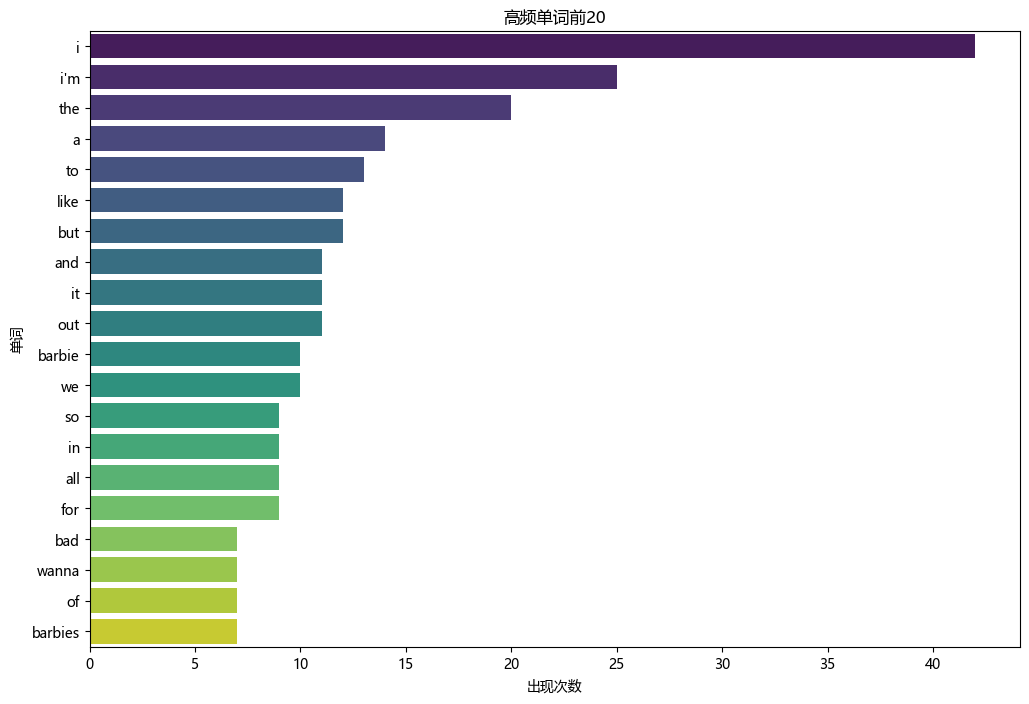

In [26]:
plot_most_common_words(most_common_words(lyrics1,20),20)

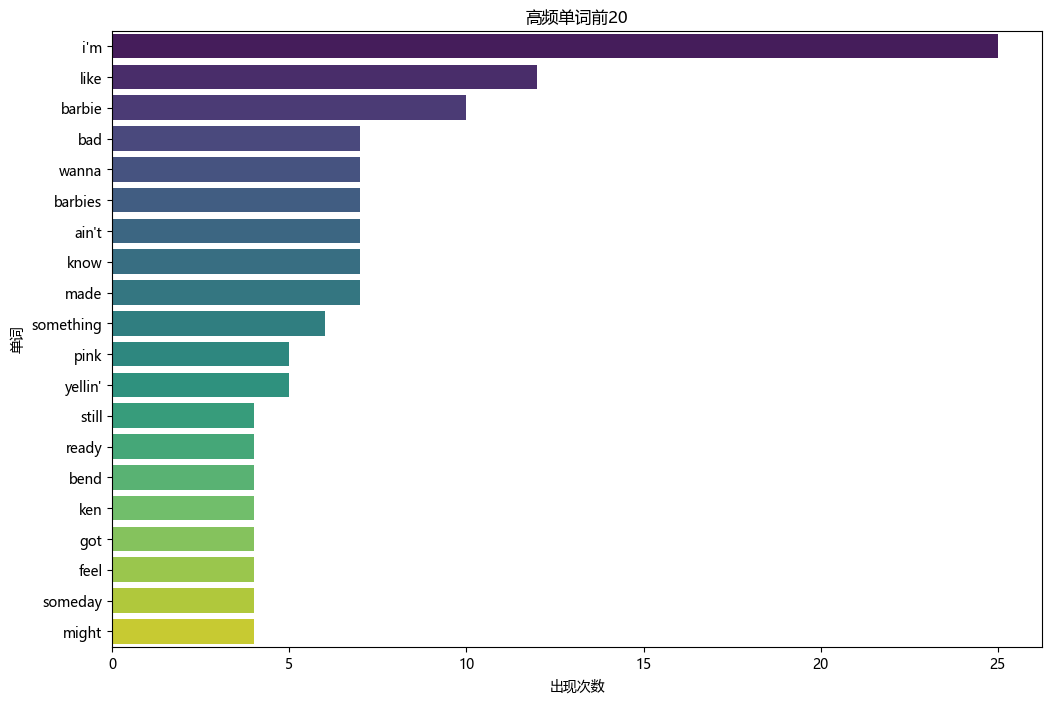

In [27]:
plot_most_common_words(most_common_words(no_stopwords_lyrics1,20),20)

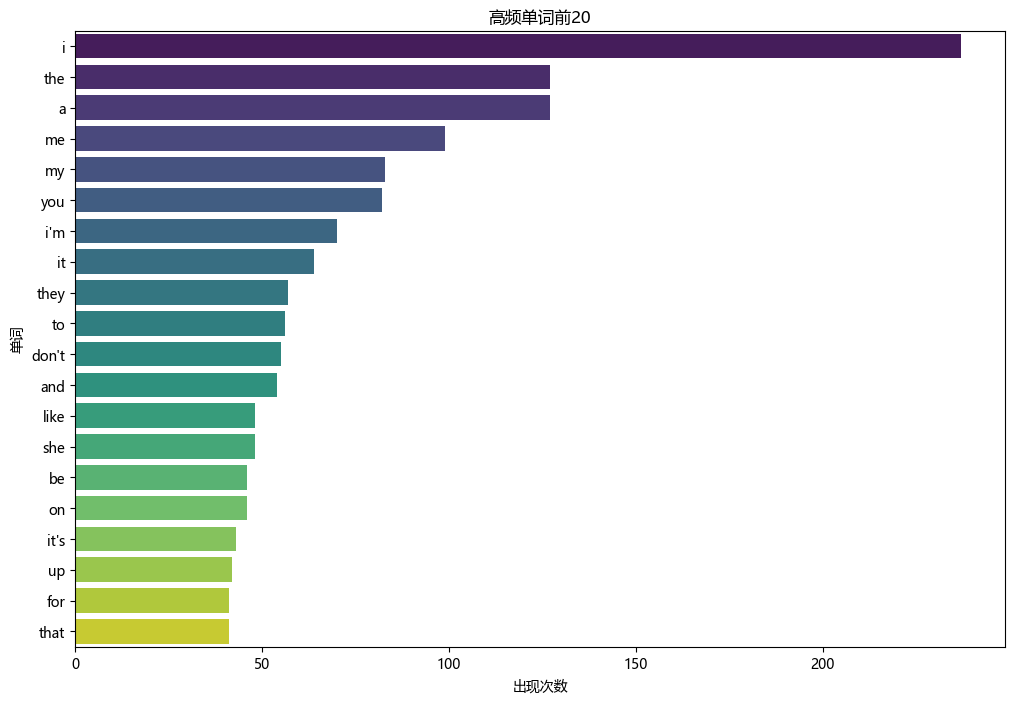

In [28]:
plot_most_common_words(most_common_words(lyrics2,20),20)

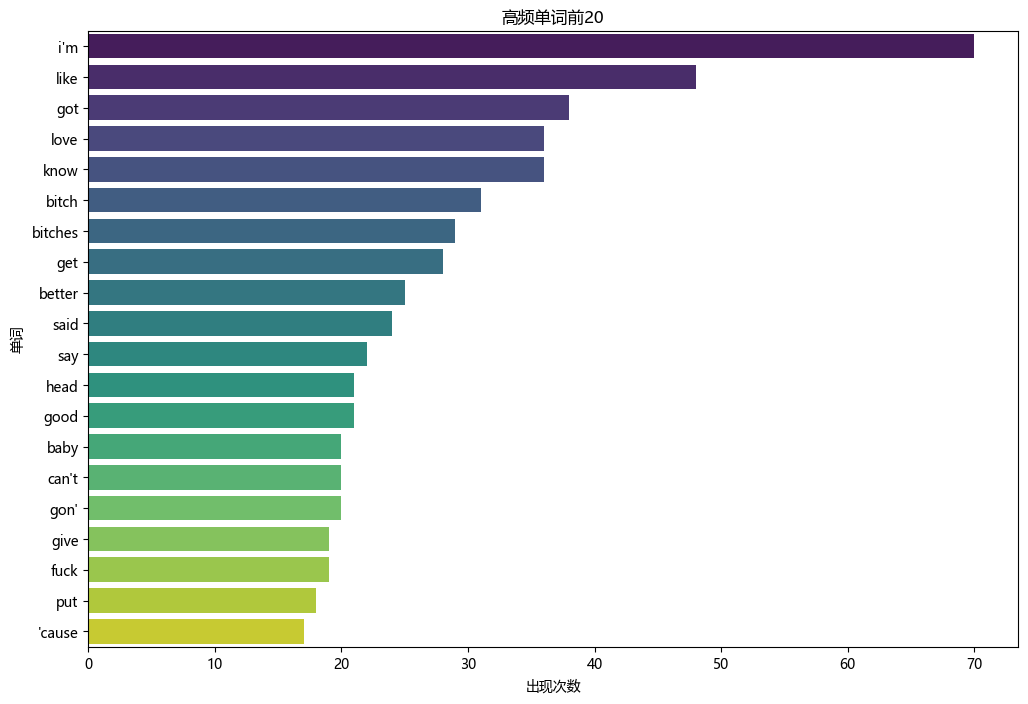

In [29]:
plot_most_common_words(most_common_words(no_stopwords_lyrics2,20),20)

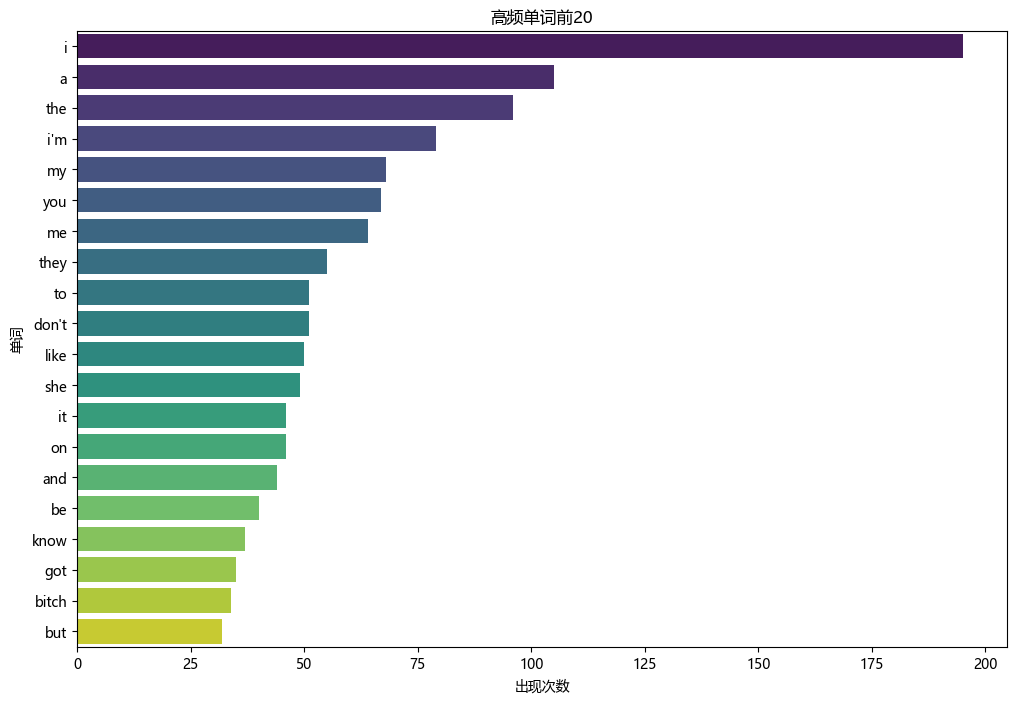

In [30]:
plot_most_common_words(most_common_words(lyrics3,20),20)

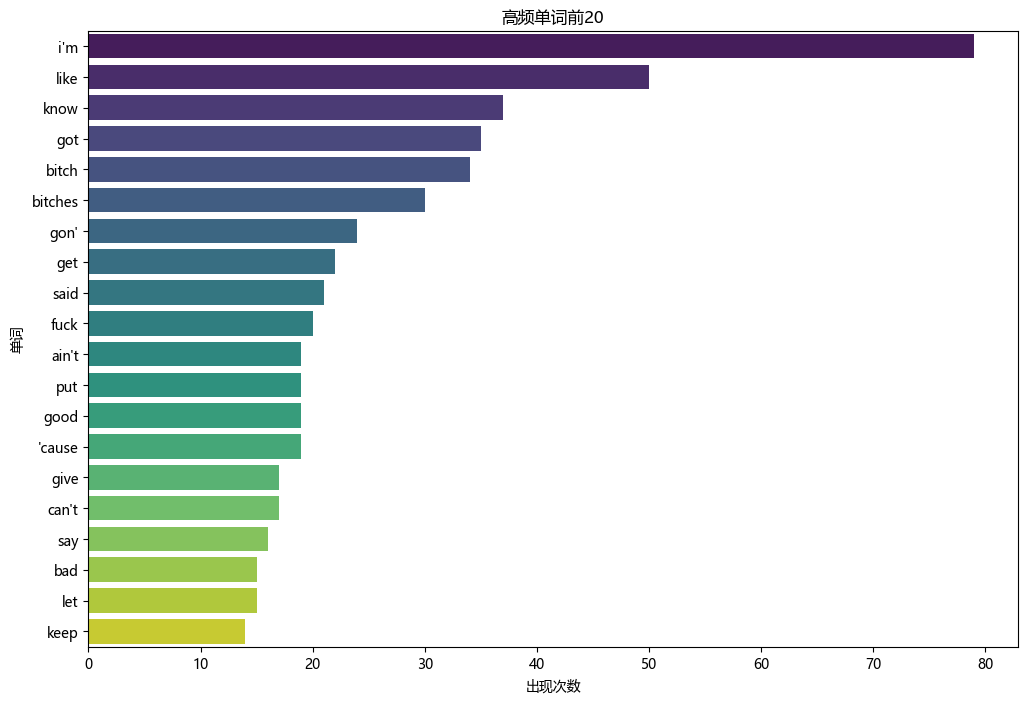

In [31]:
plot_most_common_words(most_common_words(no_stopwords_lyrics3,20),20)

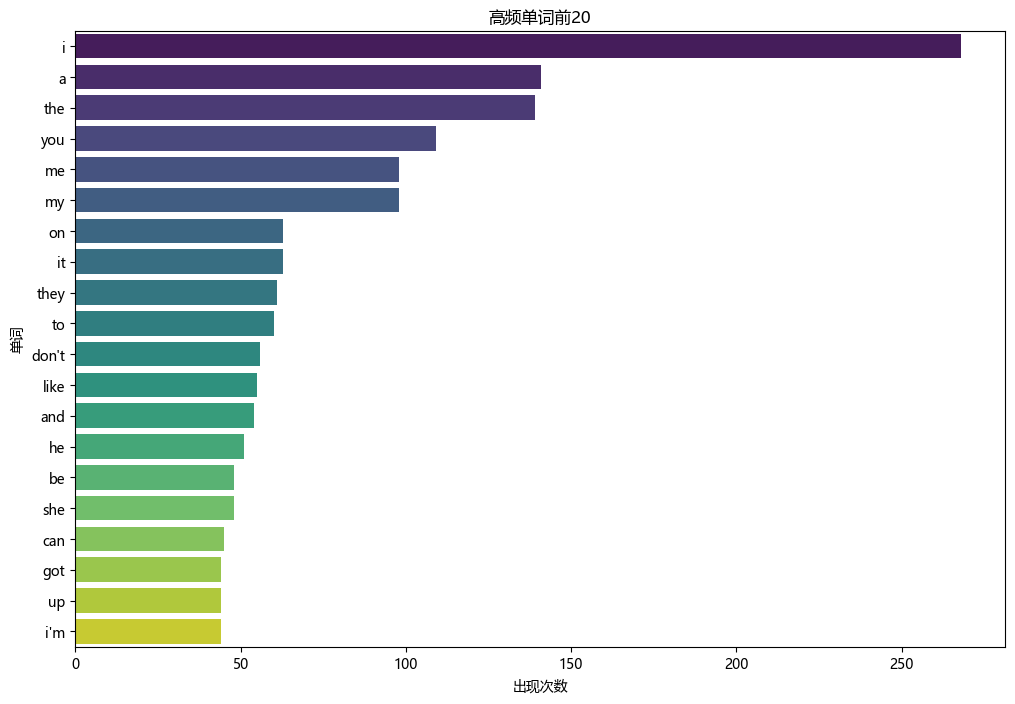

In [32]:
plot_most_common_words(most_common_words(lyrics4,20),20)

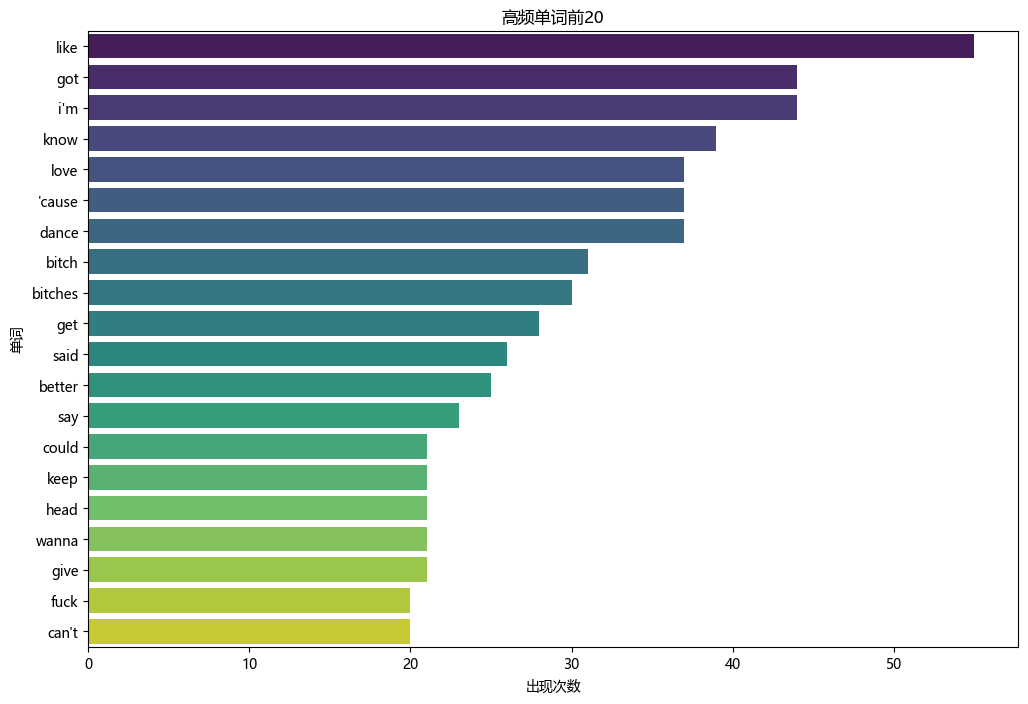

In [33]:
plot_most_common_words(most_common_words(no_stopwords_lyrics4,20),20)

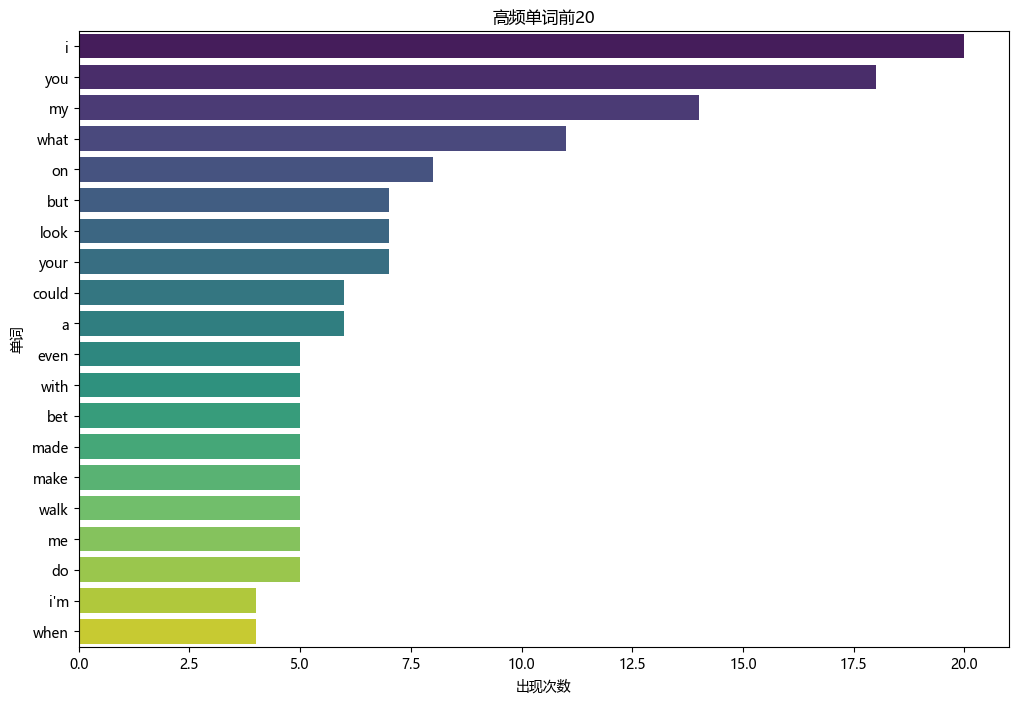

In [34]:
plot_most_common_words(most_common_words(lyrics5,20),20)

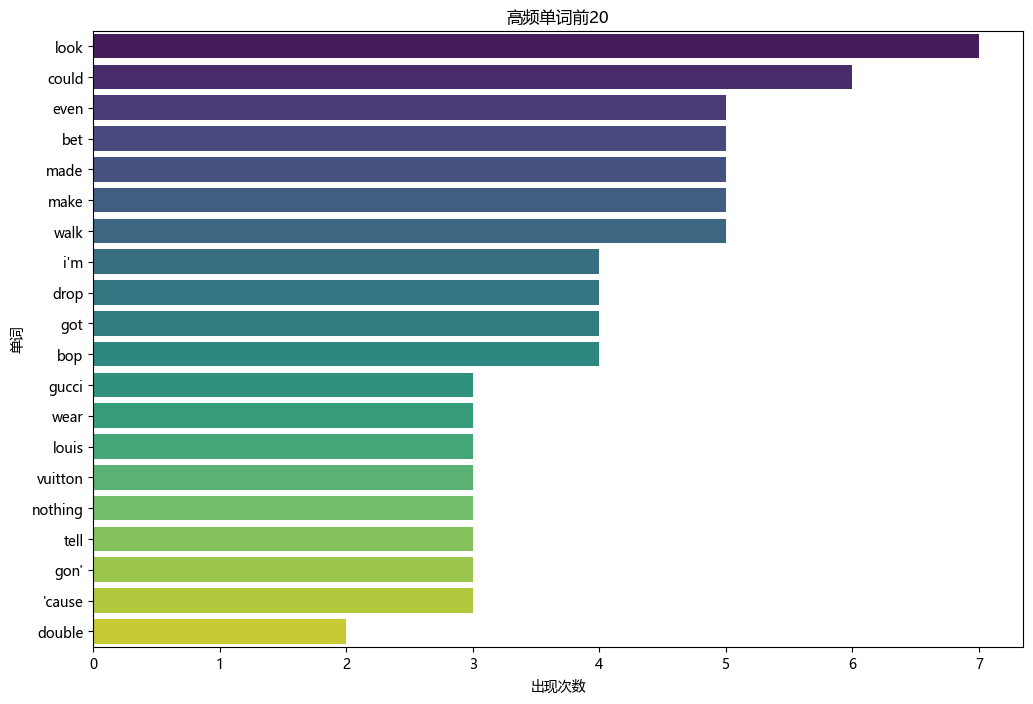

In [35]:
plot_most_common_words(most_common_words(no_stopwords_lyrics5,20),20)

In [36]:
# def generate_wordcloud(text):
#     # 创建词云对象
#     wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
#     # 显示词云图
#     plt.figure(figsize=(10, 5))
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.axis('off')  # 去掉坐标轴
#     plt.show()

In [37]:
# generate_wordcloud(lyrics1)

# 3.主题分析

In [39]:
# 下载停用词列表
nltk.download('stopwords')
from nltk.corpus import stopwords

def topic_analysis(text, n_topics=1, n_words=5):
    # 文本预处理
    stop_words = set(stopwords.words('english'))
    text = text.lower() # 转小写
    words = [word for word in text.split() if word not in stop_words]  # 去除停用词
    
    # 使用 CountVectorizer 转换为词频矩阵
    vectorizer = CountVectorizer()
    text_vectorized = vectorizer.fit_transform([' '.join(words)])
    
    # 使用 LDA 模型提取主题
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
    lda.fit(text_vectorized)
    
    # 获取词汇表
    words = vectorizer.get_feature_names_out()
    
    # 输出每个主题的关键词
    topics = {}
    for idx, topic in enumerate(lda.components_):
        top_words = [words[i] for i in topic.argsort()[-n_words:][::-1]]
        topics[f"主题 {idx + 1}"] = top_words
    
    return topics

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
topic_analysis(lyrics1)

{'主题 1': ['like', 'barbie', 'made', 'bad', 'barbies']}

In [41]:
topic_analysis(lyrics2)

{'主题 1': ['like', 'got', 'know', 'love', 'bitch']}

In [42]:
topic_analysis(lyrics3)

{'主题 1': ['like', 'know', 'got', 'bitch', 'bitches']}

In [43]:
topic_analysis(lyrics4)

{'主题 1': ['like', 'got', 'know', 'cause', 'dance']}

In [44]:
topic_analysis(lyrics5)

{'主题 1': ['look', 'could', 'walk', 'bet', 'made']}

# 4.歌词情感分析

In [46]:
def lyrics_sentiment_analysis_and_plot(lyrics):
    """
    针对歌词研究的情感分析函数，逐行分析情感并可视化情感得分的分布。

    参数:
        lyrics (str): 输入的歌词文本，每行代表一段歌词。

    返回:
        dict: 每种情感类型的平均得分，包括 'neg'（负面）, 'neu'（中性）, 'pos'（正面） 和 'compound'（总体）。
    """
    # 初始化 VADER 分析器
    analyzer = SentimentIntensityAnalyzer()
    
    # 初始化用于存储每行情感得分的列表
    line_sentiments = {'neg': [], 'neu': [], 'pos': [], 'compound': []}
    
    # 按行分析歌词
    lines = lyrics.splitlines()
    for line in lines:
        if line.strip():  # 跳过空行
            sentiment = analyzer.polarity_scores(line)
            line_sentiments['neg'].append(sentiment['neg'])
            line_sentiments['neu'].append(sentiment['neu'])
            line_sentiments['pos'].append(sentiment['pos'])
            line_sentiments['compound'].append(sentiment['compound'])
    
    # 计算每种情感类型的平均得分
    avg_scores = {emotion: sum(scores) / len(scores) for emotion, scores in line_sentiments.items()}
    
    # 创建更现代的配色方案
    sns.set(style="whitegrid")
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # 柔和的粉红、蓝、绿、橙色
    
    # 可视化每种情感的得分分布
    plt.figure(figsize=(14, 6))
    
    # 负面、中性和正面情感的箱形图
    plt.subplot(1, 2, 1)
    sns.boxplot(data=[line_sentiments['neg'], line_sentiments['neu'], line_sentiments['pos']],
                palette=colors[:3])
    plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
    plt.title('Distribution of Sentiment Scores per Line')
    plt.ylabel('Score')
    
    # 综合情感得分（compound）的分布直方图
    plt.subplot(1, 2, 2)
    sns.histplot(line_sentiments['compound'], bins=10, kde=True, color=colors[3], edgecolor='black')
    plt.title('Compound Sentiment Score Distribution')
    plt.xlabel('Compound Score')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
    return avg_scores

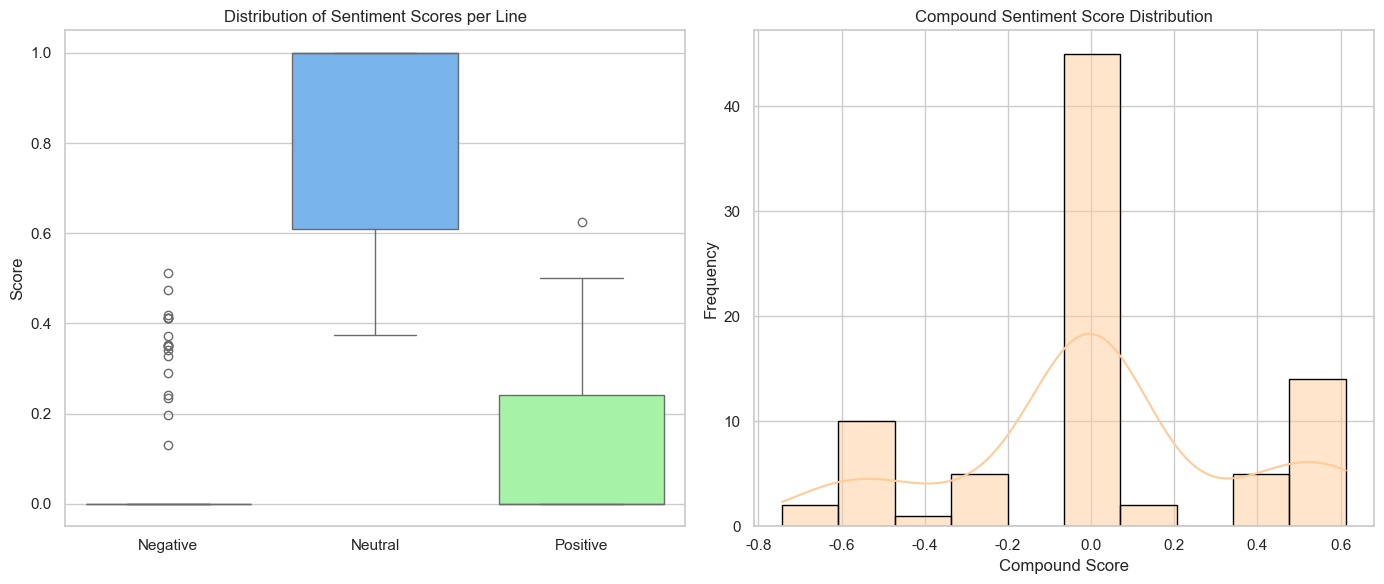

{'neg': 0.08260714285714285,
 'neu': 0.8097142857142858,
 'pos': 0.10767857142857143,
 'compound': 0.013679761904761908}

In [47]:
lyrics_sentiment_analysis_and_plot(lyrics1)

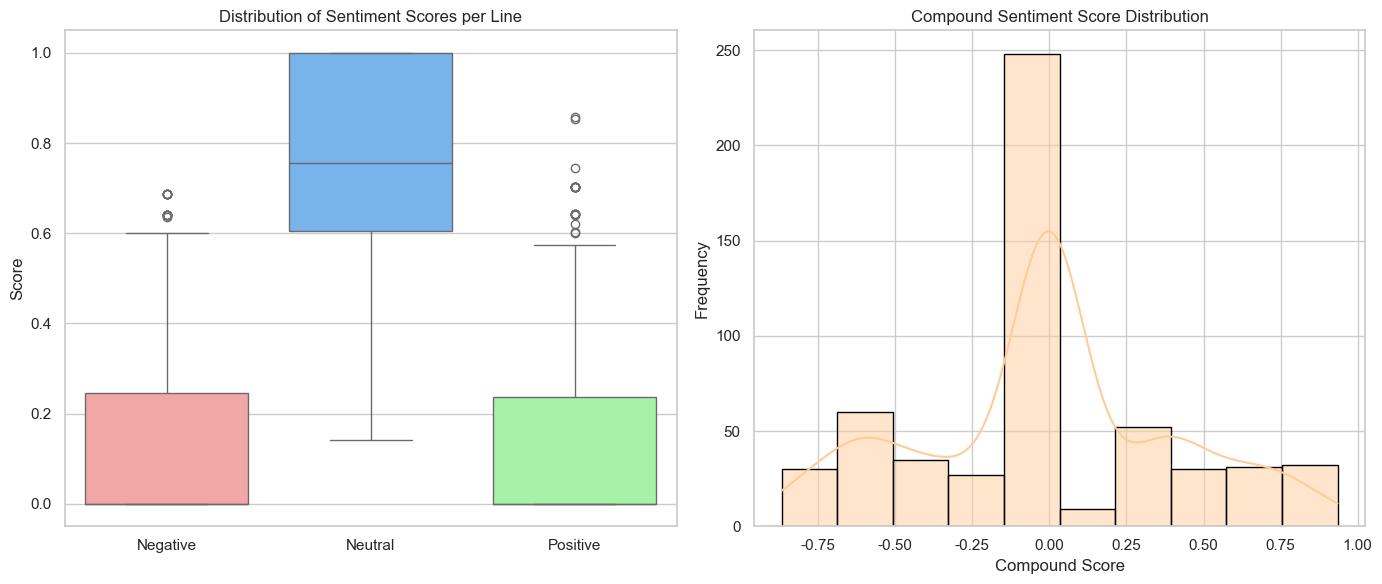

{'neg': 0.11169675090252708,
 'neu': 0.7648736462093862,
 'pos': 0.12342418772563175,
 'compound': -0.007343321299638986}

In [48]:
lyrics_sentiment_analysis_and_plot(lyrics2)

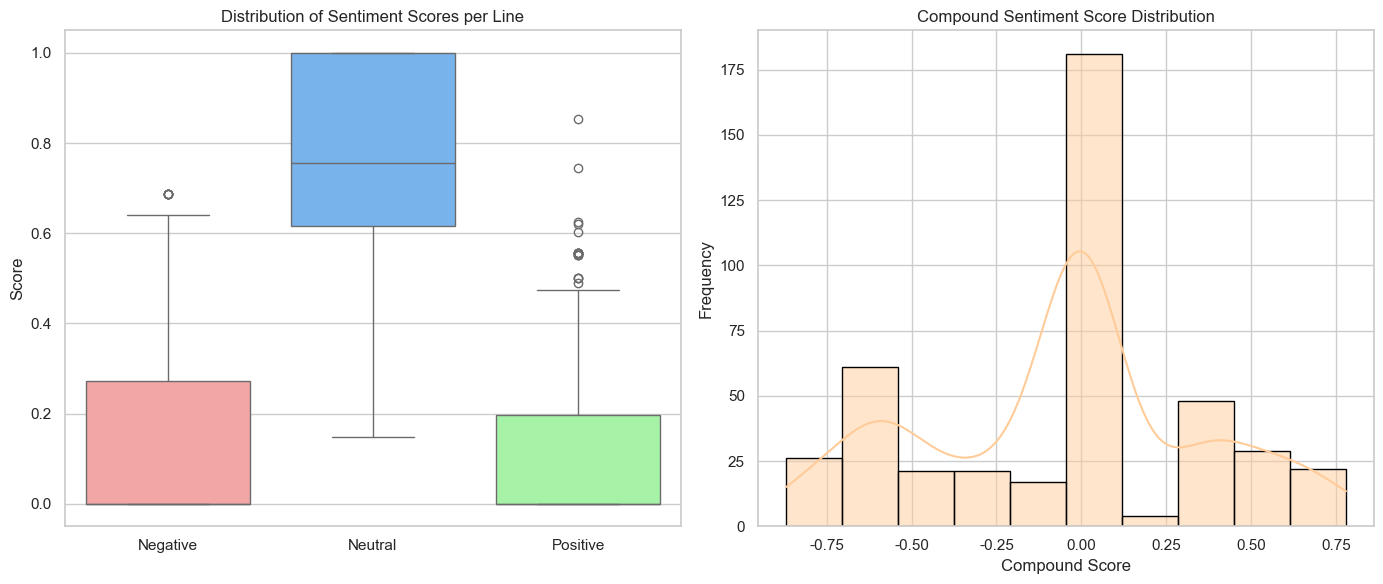

{'neg': 0.12705348837209304,
 'neu': 0.7701023255813954,
 'pos': 0.10283023255813953,
 'compound': -0.05401093023255814}

In [49]:
lyrics_sentiment_analysis_and_plot(lyrics3)

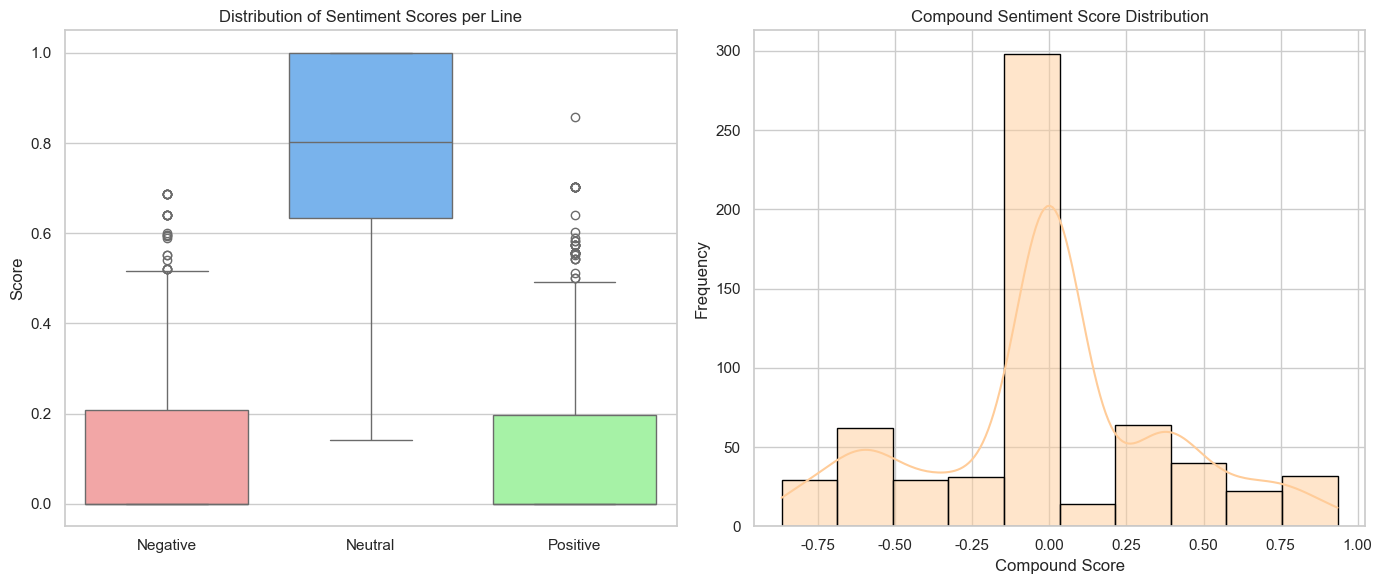

{'neg': 0.09808856682769726,
 'neu': 0.7922383252818036,
 'pos': 0.10966505636070854,
 'compound': 0.0015798711755233513}

In [50]:
lyrics_sentiment_analysis_and_plot(lyrics4)

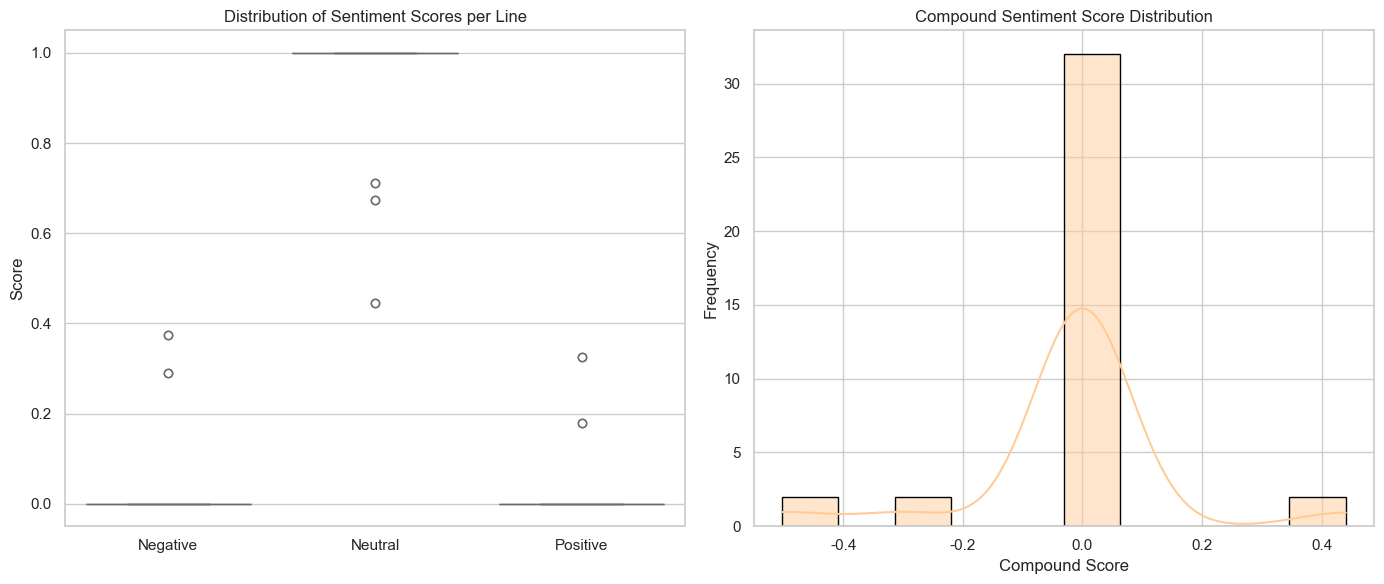

{'neg': 0.03494736842105263,
 'neu': 0.9384736842105262,
 'pos': 0.026578947368421053,
 'compound': -0.018836842105263155}

In [51]:
lyrics_sentiment_analysis_and_plot(lyrics5)

# 5. 语言风格分析

In [53]:

def lyrics_style_analysis(lyrics, song_num):
    """
    对给定的歌词字符串进行语言风格分析，区分代词使用频率（第一人称与第二/第三人称），并统计其他语言风格特征。
    
    参数：
        lyrics (str): 歌曲的歌词字符串。
        song_num (int): 歌曲的数量，用于计算平均字数。
    
    返回：
        dict: 包含歌词语言风格分析结果的字典。
    """
    # 定义代词类别
    first_person_pronouns = ["i", "me", "my", "mine", "we", "our", "ours", "i'm"]  # 第一人称代词
    second_third_person_pronouns = ["you", "your", "yours", "he", "him", "his", "she", "her", "they", "them", "their", "theirs"]  # 第二/第三人称代词
    
    # 定义其他词汇类别
    emotional_words = ["love", "hate", "happy", "sad", "angry", "joy", "fear", "like", "excited", "depressed", 
                       "hopeful", "proud", "lonely", "anxious", "content", "frustrated", "delighted", 
                       "miserable", "ecstatic", "nervous", "calm"]
    action_verbs = ["walk", "run", "dance", "sing", "fight", "play", "work", "move", "go", "jump", "talk", 
                    "cry", "laugh", "drive", "write", "read", "swim", "climb", "build", "throw", "catch", 
                    "draw", "cook", "paint", "travel"]
    
    # 处理缩写，将 "i'm" 替换为 "i am"
    lyrics = re.sub(r"\bi'm\b", "i am", lyrics, flags=re.IGNORECASE)
    
    # 将歌词转换为小写并分词
    words = re.findall(r'\b\w+\b', lyrics.lower())
    word_counts = Counter(words)
    
    # 统计不同类别代词的使用频率
    first_person_count = sum(word_counts[word] for word in first_person_pronouns if word in word_counts)
    second_third_person_count = sum(word_counts[word] for word in second_third_person_pronouns if word in word_counts)
    total_pronoun_count = first_person_count + second_third_person_count
    
    # 统计情感词和动作动词
    emotional_word_count = sum(word_counts[word] for word in emotional_words if word in word_counts)
    action_verb_count = sum(word_counts[word] for word in action_verbs if word in word_counts)
    total_word_count = sum(word_counts.values())
    
    # 计算相对频率
    first_person_freq = first_person_count / total_word_count if total_word_count > 0 else 0
    second_third_person_freq = second_third_person_count / total_word_count if total_word_count > 0 else 0
    emotional_word_freq = emotional_word_count / total_word_count if total_word_count > 0 else 0
    action_verb_freq = action_verb_count / total_word_count if total_word_count > 0 else 0
    
    # 计算每句话的长度
    sentences = lyrics.splitlines()
    sentence_lengths = [len(re.findall(r'\b\w+\b', sentence)) for sentence in sentences if len(sentence.strip()) > 0]
    average_sentence_length = sum(sentence_lengths) / len(sentence_lengths) if len(sentence_lengths) > 0 else 0
    
    # 将结果存储到字典中
    style_analysis_result = {
        'First Person Pronoun Frequency': first_person_freq,
        'Second/Third Person Pronoun Frequency': second_third_person_freq,
        'Emotional Word Frequency': emotional_word_freq,
        'Action Verb Frequency': action_verb_freq,
        'Average Word Count': total_word_count / song_num,
        'Average Sentence Length': average_sentence_length
    }
    
    # 可视化
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(1, 5, figsize=(24, 6))
    
    categories = [
        'First Person Pronoun Frequency', 
        'Second/Third Person Pronoun Frequency', 
        'Emotional Word Frequency', 
        'Action Verb Frequency', 
        'Average Sentence Length'
    ]
    values = [
        first_person_freq, 
        second_third_person_freq, 
        emotional_word_freq, 
        action_verb_freq, 
        average_sentence_length
    ]
    colors = ['lightblue', 'lightgreen', 'salmon', 'lightcoral', 'lightpink']
    
    for i in range(5):
        ax[i].bar(categories[i], values[i], color=colors[i])
        if i < 4:
            ax[i].set_ylim(0, 1)
        else:
            ax[i].set_ylim(0, max(values) * 1.2)
        ax[i].set_title(f'{categories[i]} for Given Lyrics')
        ax[i].set_ylabel('Value')
    
    plt.tight_layout()
    plt.show()
    
    # 输出表格
    print(tabulate([style_analysis_result.values()], headers=style_analysis_result.keys(), tablefmt="fancy_grid"))
    
    return style_analysis_result


In [54]:
print(lyrics1)

i'm always yours
and i'm bad like the barbie
i'm a doll but i still wanna party
pink 'vette like i'm ready to bend
i'm a ten so i pull in a ken
like jazzie stacie nicki
all of the barbies is pretty
all of the barbies is bad
it girls and we ain't playin' tag
rad but he spank me when i get bad
i'm in rodeo drive
i'm in new york madison ave
i'm a barbie girl pink barbie dreamhouse
the way ken be killin' shit
got me yellin' out like the scream house
yellin' out we ain't sellin' out
we got money but we ain't lendin' out
we got bars but we ain't bailin' out
in that pink ferrari we peelin' out
i told tae bring the bob dylan out
that pussy so cold we just chillin' out
they be yellin' yellin' ye yellin' out
it's barbie bitch if you still in doubt
and i'm bad like the barbie
i'm a doll but i still wanna party
pink 'vette like i'm ready to bend
i'm a ten so i pull in a ken
like jazzie stacie nicki
all of the barbies is pretty
all of the barbies is bad
it girls and we ain't playin' tag
barbie ain'

In [55]:
print(lyrics2)

i have this thing where i get older but just never wiser
midnights become my afternoons
when my depression works the graveyard shift all of the people
i've ghosted stand there in the room
i should not be left to my own devices
they come with prices and vices
i end up in crisis

i wake up screaming from dreaming
one day i'll watch as you're leaving
'cause you got tired of my scheming

it's me hi
i'm the problem it's me
at teatime
everybody agrees
i'll stare directly at the sun but never in the mirror
it must be exhausting always rooting for the anti hero
sometimes i feel like everybody is a sexy baby
and i'm a monster on the hill
too big to hang out slowly lurching toward your favorite city
pierced through the heart but never killed
did you hear my covert narcissism
i disguise as altruism
like some kind of congressman

i wake up screaming from dreaming
one day i'll watch as you're leaving
and life will lose all its meaning

it's me hi
i'm the problem it's me
at teatime
everybody agrees


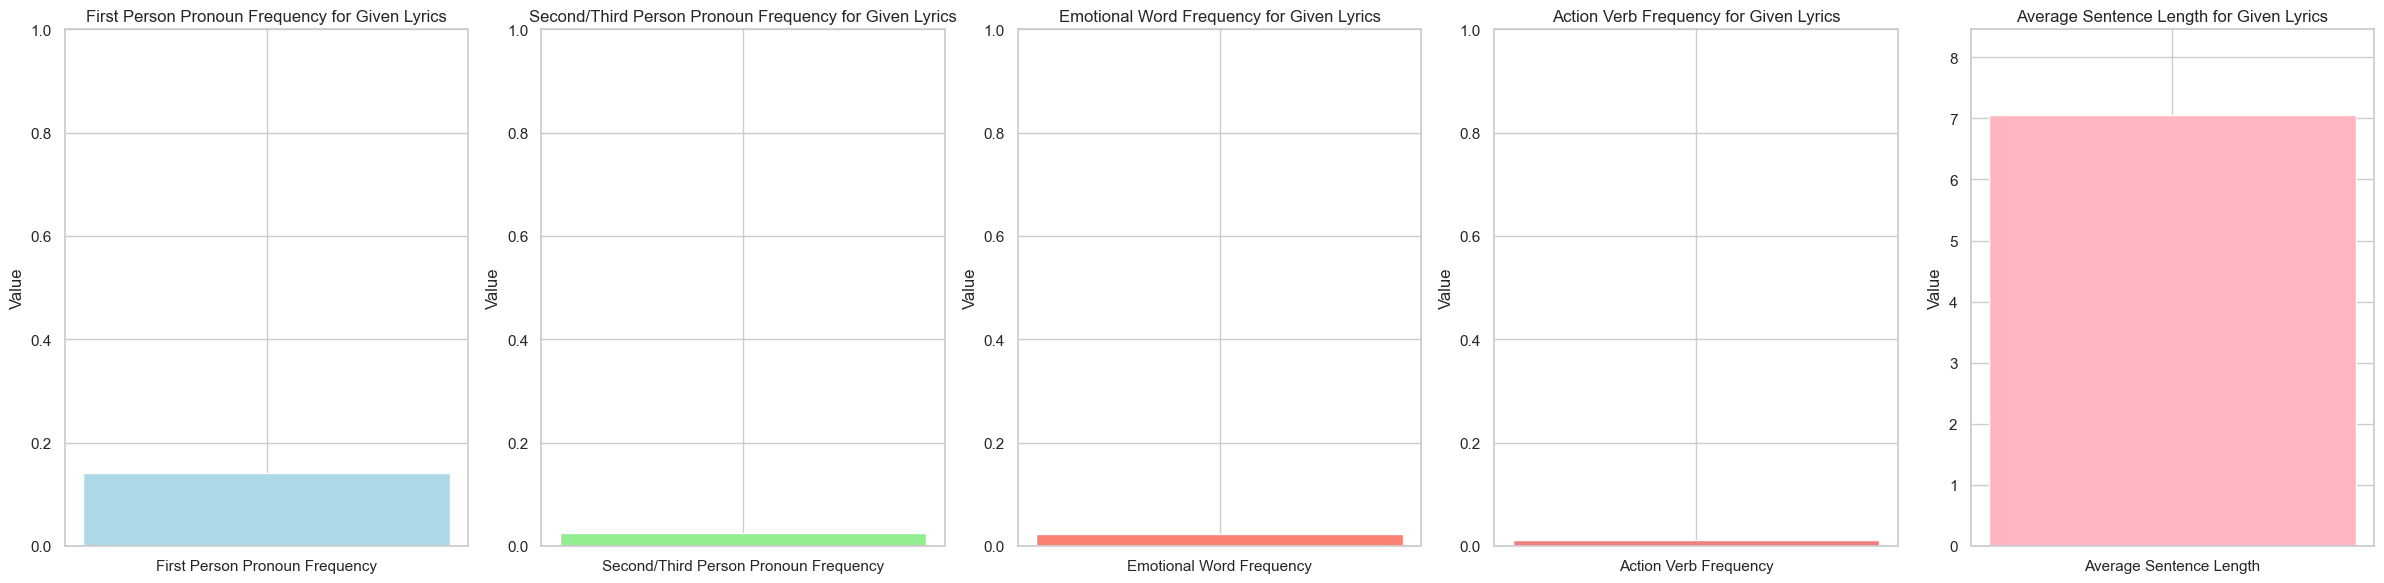

╒══════════════════════════════════╤═════════════════════════════════════════╤════════════════════════════╤═════════════════════════╤══════════════════════╤═══════════════════════════╕
│   First Person Pronoun Frequency │   Second/Third Person Pronoun Frequency │   Emotional Word Frequency │   Action Verb Frequency │   Average Word Count │   Average Sentence Length │
╞══════════════════════════════════╪═════════════════════════════════════════╪════════════════════════════╪═════════════════════════╪══════════════════════╪═══════════════════════════╡
│                         0.140203 │                               0.0253378 │                  0.0236486 │               0.0118243 │                  296 │                   7.04762 │
╘══════════════════════════════════╧═════════════════════════════════════════╧════════════════════════════╧═════════════════════════╧══════════════════════╧═══════════════════════════╛
{'First Person Pronoun Frequency': 0.14020270270270271, 'Second/Third Perso

In [56]:
# 调用函数进行语言风格分析
print(lyrics_style_analysis(lyrics1,2))

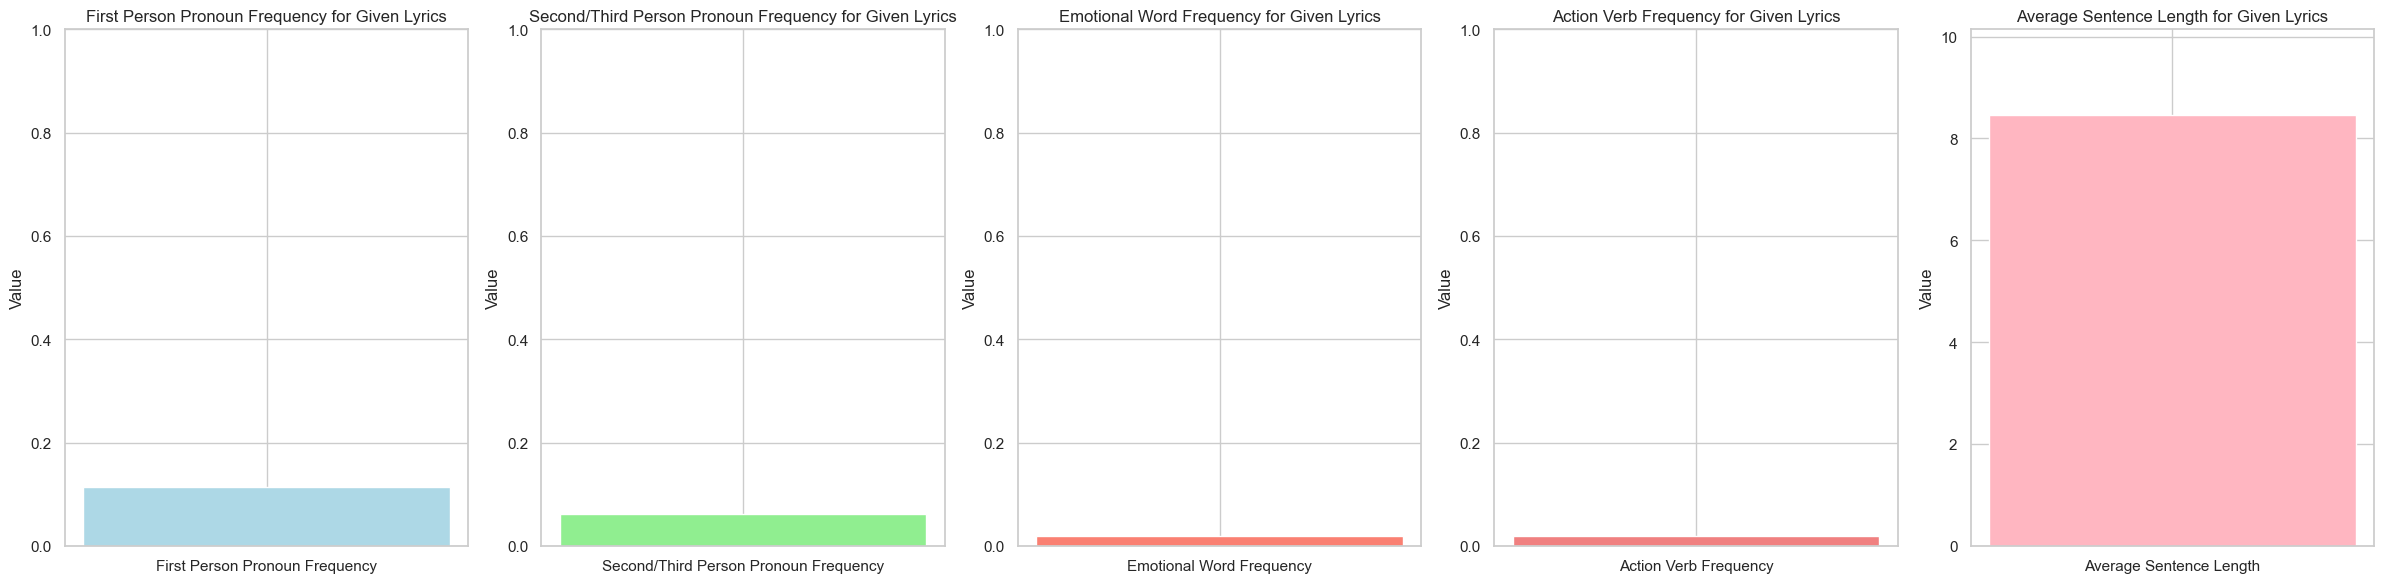

╒══════════════════════════════════╤═════════════════════════════════════════╤════════════════════════════╤═════════════════════════╤══════════════════════╤═══════════════════════════╕
│   First Person Pronoun Frequency │   Second/Third Person Pronoun Frequency │   Emotional Word Frequency │   Action Verb Frequency │   Average Word Count │   Average Sentence Length │
╞══════════════════════════════════╪═════════════════════════════════════════╪════════════════════════════╪═════════════════════════╪══════════════════════╪═══════════════════════════╡
│                         0.113651 │                               0.0623798 │                  0.0183721 │               0.0181585 │                468.1 │                   8.44946 │
╘══════════════════════════════════╧═════════════════════════════════════════╧════════════════════════════╧═════════════════════════╧══════════════════════╧═══════════════════════════╛


{'First Person Pronoun Frequency': 0.11365092928861355,
 'Second/Third Person Pronoun Frequency': 0.062379833368938264,
 'Emotional Word Frequency': 0.01837214270455031,
 'Action Verb Frequency': 0.01815851313821833,
 'Average Word Count': 468.1,
 'Average Sentence Length': 8.449458483754512}

In [57]:
lyrics_style_analysis(lyrics2,10)

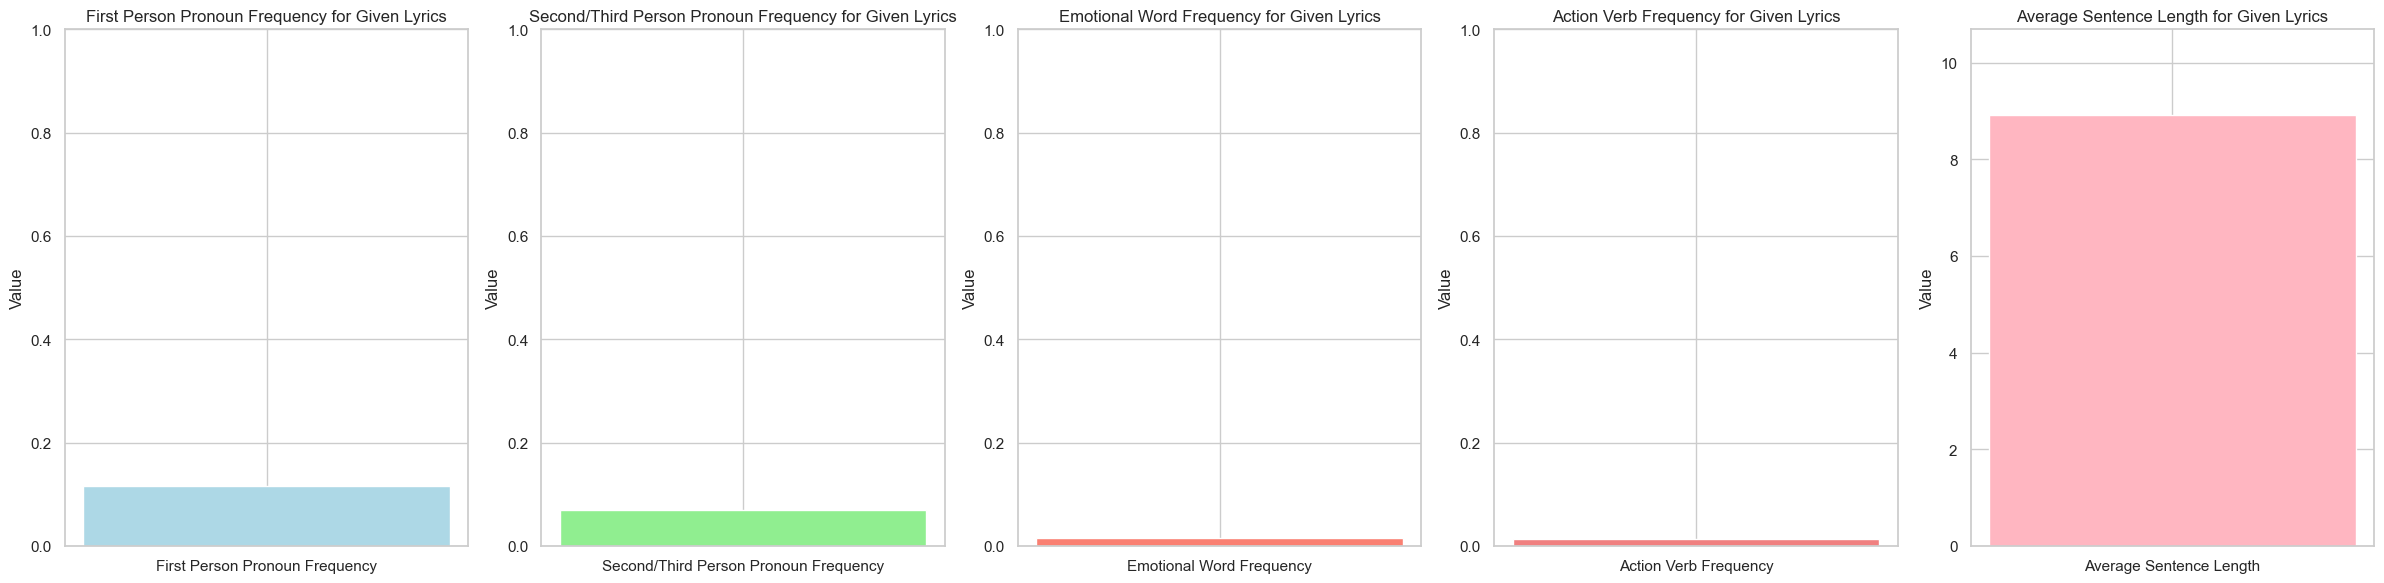

╒══════════════════════════════════╤═════════════════════════════════════════╤════════════════════════════╤═════════════════════════╤══════════════════════╤═══════════════════════════╕
│   First Person Pronoun Frequency │   Second/Third Person Pronoun Frequency │   Emotional Word Frequency │   Action Verb Frequency │   Average Word Count │   Average Sentence Length │
╞══════════════════════════════════╪═════════════════════════════════════════╪════════════════════════════╪═════════════════════════╪══════════════════════╪═══════════════════════════╡
│                         0.115435 │                               0.0694698 │                  0.0156699 │               0.0138417 │                  547 │                   8.90465 │
╘══════════════════════════════════╧═════════════════════════════════════════╧════════════════════════════╧═════════════════════════╧══════════════════════╧═══════════════════════════╛


{'First Person Pronoun Frequency': 0.11543483938365108,
 'Second/Third Person Pronoun Frequency': 0.06946983546617916,
 'Emotional Word Frequency': 0.015669887699138157,
 'Action Verb Frequency': 0.013841734134238705,
 'Average Word Count': 547.0,
 'Average Sentence Length': 8.904651162790698}

In [58]:
lyrics_style_analysis(lyrics3,7)

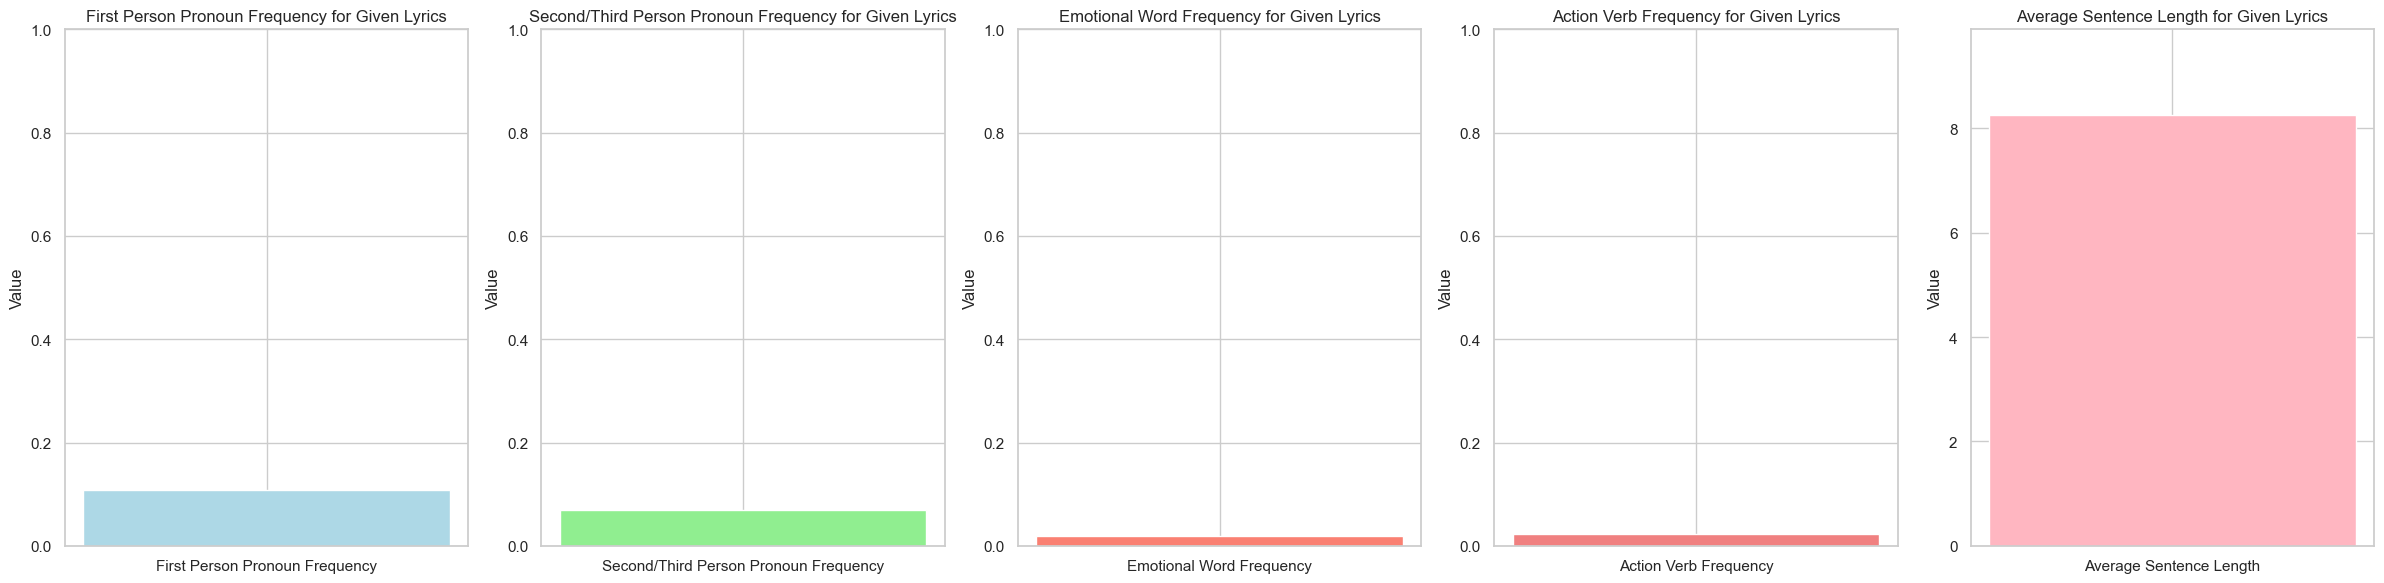

╒══════════════════════════════════╤═════════════════════════════════════════╤════════════════════════════╤═════════════════════════╤══════════════════════╤═══════════════════════════╕
│   First Person Pronoun Frequency │   Second/Third Person Pronoun Frequency │   Emotional Word Frequency │   Action Verb Frequency │   Average Word Count │   Average Sentence Length │
╞══════════════════════════════════╪═════════════════════════════════════════╪════════════════════════════╪═════════════════════════╪══════════════════════╪═══════════════════════════╡
│                         0.107227 │                                 0.06875 │                  0.0185547 │               0.0234375 │              465.455 │                   8.24477 │
╘══════════════════════════════════╧═════════════════════════════════════════╧════════════════════════════╧═════════════════════════╧══════════════════════╧═══════════════════════════╛


{'First Person Pronoun Frequency': 0.1072265625,
 'Second/Third Person Pronoun Frequency': 0.06875,
 'Emotional Word Frequency': 0.0185546875,
 'Action Verb Frequency': 0.0234375,
 'Average Word Count': 465.45454545454544,
 'Average Sentence Length': 8.24476650563607}

In [59]:
lyrics_style_analysis(lyrics4,11)

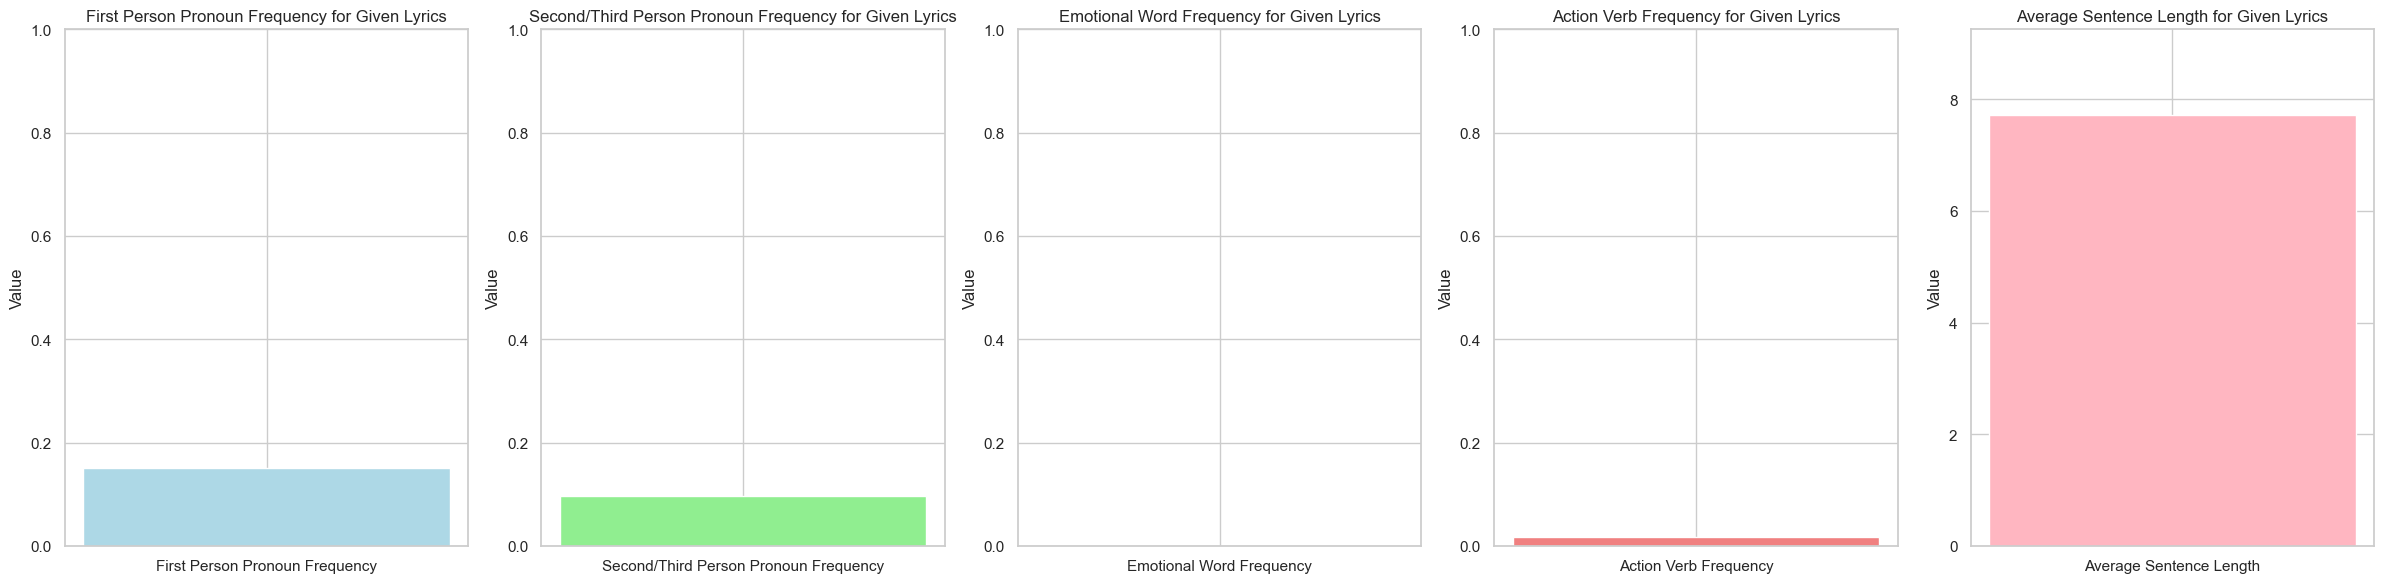

╒══════════════════════════════════╤═════════════════════════════════════════╤════════════════════════════╤═════════════════════════╤══════════════════════╤═══════════════════════════╕
│   First Person Pronoun Frequency │   Second/Third Person Pronoun Frequency │   Emotional Word Frequency │   Action Verb Frequency │   Average Word Count │   Average Sentence Length │
╞══════════════════════════════════╪═════════════════════════════════════════╪════════════════════════════╪═════════════════════════╪══════════════════════╪═══════════════════════════╡
│                         0.150171 │                               0.0955631 │                          0 │               0.0170648 │                  293 │                   7.71053 │
╘══════════════════════════════════╧═════════════════════════════════════════╧════════════════════════════╧═════════════════════════╧══════════════════════╧═══════════════════════════╛


{'First Person Pronoun Frequency': 0.15017064846416384,
 'Second/Third Person Pronoun Frequency': 0.09556313993174062,
 'Emotional Word Frequency': 0.0,
 'Action Verb Frequency': 0.017064846416382253,
 'Average Word Count': 293.0,
 'Average Sentence Length': 7.7105263157894735}

In [60]:
lyrics_style_analysis(lyrics5,1)

# 6.情绪分析

In [62]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download the VADER lexicon if not already installed
nltk.download("vader_lexicon")

def detect_emotion_with_vader(text: str) -> str:
    """
    Use VADER to analyze the sentiment of a given text and map it to emotions.

    Args:
        text (str): The input text to analyze.

    Returns:
        str: The detected emotion category (happy, sad, angry, or neutral).
    """
    # Initialize the VADER sentiment analyzer
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)

    # Map sentiment to custom emotion categories
    if sentiment_scores["compound"] >= 0.5:
        return "happy"
    elif sentiment_scores["compound"] <= -0.5:
        return "sad"
    elif -0.5 < sentiment_scores["compound"] < 0:
        return "angry"
    else:
        return "neutral"

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [63]:
print(detect_emotion_with_vader(lyrics1))

angry


In [64]:
print(detect_emotion_with_vader(lyrics2))

sad


In [65]:
print(detect_emotion_with_vader(lyrics3))

sad


In [66]:
print(detect_emotion_with_vader(lyrics4))

sad


In [67]:
print(detect_emotion_with_vader(lyrics5))

sad
